<a href="https://colab.research.google.com/github/sayoneenandi/waiting_in_aNe/blob/main/System_Dynamics_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
historic_ratio=pd.read_excel("/content/IC-02 Historical Ratio.xlsx")
historic_ratio.head()

,Time,Ratio Admission to Attendance
0,1,0.356605
1,2,0.340786
2,3,0.330214
3,4,0.324555
4,5,0.344071


# rolling average ed attendance

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
!pip install mplcursors
import mplcursors

class RollingAverageEDattendance:
    def __init__(self, historical_attendance, baseline_date):
        self.historical_attendance = historical_attendance
        self.baseline_date = baseline_date

        self.average_emergency_attendances = None
        self.rolling_avg_period = len(historical_attendance)

        self.data_delayed = [historical_attendance['IC-02 Historical Emergency Attendances'].iloc[0] for _ in range(self.rolling_avg_period)]
        self.historical_std_dev = np.std(historical_attendance['IC-02 Historical Emergency Attendances'])

    def delay(self, new_value):
        self.data_delayed.pop(0)
        self.data_delayed.append(new_value)
        return self.data_delayed[0]

    def calculate_delay_factor(self, current_time):
        if current_time < self.baseline_date:
            return self.historical_attendance.loc[current_time]['IC-02 Historical Emergency Attendances']
        else:
            return self.delay(self.historical_attendance.loc[current_time]['IC-02 Historical Emergency Attendances'])

    def average_emergency(self, current_time, weekly_data):
        if current_time < self.baseline_date:
            return weekly_data
        else:
            rolling_avg_emergency = self.cumulative / self.rolling_avg_period
            std_dev_emergency = self.calculate_std_dev(current_time)
            return np.random.normal(rolling_avg_emergency, std_dev_emergency)

    def rolling_average_ed_attendance_avg_Emg_attendances(self, current_time):
        weekly_data = self.historical_attendance.loc[current_time]['IC-02 Historical Emergency Attendances']
        self.rolling_avg_period = len(self.historical_attendance.loc[:current_time])
        rolling_avg_emergency = self.cumulative / self.rolling_avg_period

        self.average_emergency_attendances = self.average_emergency(current_time, weekly_data)
        return self.average_emergency_attendances

    def calculate_std_dev(self, current_time):
        recent_attendance = self.historical_attendance['IC-02 Historical Emergency Attendances'][-self.rolling_avg_period:]
        return np.std(recent_attendance)

    def calculate_weekly_variation(self, date, weekly_data):
        if date < self.baseline_date:
            return abs(weekly_data - self.cumulative / self.rolling_avg_period)
        else:
            return 0

    def run_simulation(self, start_time, end_time, dt_denominator):
       def run_simulation(self, start_time, end_time, dt_denominator):
        dates = DynamicModel.time(dt_denominator, start_time, end_time)  # Use DynamicModel's static time method here
        forecast = []
        rolling_avg = []
        std_dev = []
        self.cumulative = 0
        self.deviation = 0

        for date in dates:
            rolling_avg_emergency = self.rolling_average_ed_attendance_avg_Emg_attendances(date)
            weekly_data_cumulative_inflow = rolling_avg_emergency
            weekly_variation_deviation_inflow = self.calculate_weekly_variation(date, rolling_avg_emergency)

            dt = 1  # Assuming time step of 1 week
            self.cumulative = self.cumulative + dt * (weekly_data_cumulative_inflow - self.cumulative / self.rolling_avg_period)
            self.deviation = self.deviation + dt * weekly_variation_deviation_inflow

            std_dev_emergency = self.calculate_std_dev(date)
            forecast.append(rolling_avg_emergency)
            rolling_avg.append(rolling_avg_emergency)
            std_dev.append(std_dev_emergency)

        return forecast, rolling_avg, std_dev



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21047 sha256=6c6d451f446759946386d517234253c2b2142266a5589157b1264b09ed861e6e
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


# Rolling Average Ratio Admission to Attendance

In [3]:
class RollingAverageAdmissionToAttendanceRatio:
    def __init__(self, historical_ratio, baseline_date):
        self.historical_ratio = historical_ratio
        self.baseline_date = baseline_date

        # Use global values for the parameters
        global rolling_avg_period_ratio_attendances
        global weeks_in_year
        global reduction_non_elective_admission_to_attendance_rate
        global time_in_weeks_to_reach_reduction

        self.rolling_avg_period_ratio_attendances = rolling_avg_period_ratio_attendances
        self.weeks_in_year = weeks_in_year
        self.reduction_non_elective_admission_to_attendance_rate = reduction_non_elective_admission_to_attendance_rate
        self.time_in_weeks_to_reach_reduction = time_in_weeks_to_reach_reduction
        self.data_delayed = [historical_ratio['Ratio Admission to Attendance'].iloc[0] for _ in range(self.rolling_avg_period_ratio_attendances)]
        self.cumulative = 0

    # Rest of the class remains the same

    def delay(self, new_value):
        self.data_delayed.pop(0)
        self.data_delayed.append(new_value)
        return self.data_delayed[0]

    def timestamp_to_week_num(self, timestamp):
        return int((timestamp - self.baseline_date).days / 7)

    def weekly_los(self, week_num):
        try:
            return self.historical_ratio.set_index('Time').loc[week_num]['Ratio Admission to Attendance']
        except KeyError:
            return 0

    def outofdatedata(self, week_num):
        try:
            if week_num < self.timestamp_to_week_num(self.baseline_date):
                return self.historical_ratio.set_index('Time').loc[week_num]['Ratio Admission to Attendance']
            else:
                return self.delay(self.historical_ratio.set_index('Time').loc[week_num]['Ratio Admission to Attendance'])
        except KeyError:
            return 0
    def update(self, new_data_point):
        """
        Append new data to historical_ratio.
        :param new_data_point: DataFrame row containing new data.
        """
        self.historical_ratio = self.historical_ratio.append(new_data_point, ignore_index=True)

    def run_simulation(self, start_time, end_time, dt):
        dates = pd.date_range(start=start_time, end=end_time, freq="W").tolist()  # Weekly frequency
        ratios = []

        for date in dates:
            week_num = self.timestamp_to_week_num(date)
            los = self.weekly_los(week_num)
            outdated = self.outofdatedata(week_num)
            self.cumulative += dt * (los - outdated)

            ramp_value = self.reduction_non_elective_admission_to_attendance_rate / (100 * self.weeks_in_year)
            if date >= self.baseline_date and date <= self.baseline_date + timedelta(weeks=self.time_in_weeks_to_reach_reduction):
                ramp_factor = ramp_value
            else:
                ramp_factor = 0

            ratio = self.cumulative / self.rolling_avg_period_ratio_attendances * (1 - ramp_factor)
            ratios.append(ratio)

        return ratios


# System Dynamic Model

In [4]:
class DynamicModel:
    @staticmethod
    def time(dt_denominator, start_time, end_date_sim):
        dt = 1.0 / dt_denominator
        time_increment = timedelta(weeks=int(13))  # Quarterly means every 13 weeks
        num_weeks = (end_date_sim - start_time).days // 7
        end_time = start_time + timedelta(weeks=int(num_weeks // dt_denominator))
        return pd.date_range(start=start_time, end=end_time, freq=time_increment).tolist()


    def __init__(self, A_and_E_Attendances=0, historical_attendance=[], start_time_sim=None, end_date_sim=None):
        self.A_and_E_Attendances = A_and_E_Attendances
        self.historical_attendance = historical_attendance
        self.start_time_sim = start_time_sim if start_time_sim is not None else datetime.now()
        self.end_date_sim = end_date_sim
        self.current_time = None
        self.dt = dt
        self.historical_forecast_attendances = []
        self.patients_needing_admission = []
        self.non_elective_times = []
        self.needing_admission_values = []
        self.waiting_admission_values = []
        self.a_e_admitted_ward_values = []
        # Non elective waiting admission stock initialization
        self.Non_elective_waiting_admission = 0
        self.beds_available_for_non_electives = 708
        # Create rolling_avg_forecast internally
        self.rolling_avg_forecast = RollingAverageEDattendance(self.historical_attendance, self.start_time_sim)
    def get_admission_to_attendance_ratio(self):

        ratios = rolling_avg_ratio.run_simulation(start_time_sim, end_date_sim, dt)

        current_time_index = self.time_values.index(self.current_time)
        ratio = ratios[current_time_index]

        if ratio == 0:
            ratio = 0.000001

        return ratio

    def calculate_PatientsNadmission(self, forecast_attendance):
        admission_to_attendance_ratio = self.get_admission_to_attendance_ratio()

        delay_days = avg_time_in_A_and_E_hours / (hours_in_a_day * days_in_a_week)
        patients_needing_admission = forecast_attendance * admission_to_attendance_ratio * delay_days


        print(f"Debug - calculate_PatientsNadmission: Forecast Attendance: {forecast_attendance}, Delay Days: {delay_days}")
        print(f"Debug - Patients Needing Admission: {patients_needing_admission}")

        return patients_needing_admission

    def calculate_AEnoreqAttendance(self, forecast_attendance):
        admission_to_attendance_ratio = self.get_admission_to_attendance_ratio()

        delay_days = avg_time_in_A_and_E_hours / (hours_in_a_day * days_in_a_week)
        patients_not_required_admission = forecast_attendance * (1 - admission_to_attendance_ratio) * delay_days
        print(f"Debug - calculate_AEnoreqAttendance: Forecast Attendance: {forecast_attendance}, Delay Days: {delay_days}")
        print(f"Debug - Patients Not Required Admission: {patients_not_required_admission}")

        return patients_not_required_admission

    def calculate_AEattendance(self, current_time):
        print(f"Debug - calculate_AEattendance: Current Time: {current_time}")

        if current_time < self.start_time_sim:
            # Return Rolling_average_ED_attendance instead of last historical value
            return self.rolling_avg_forecast.rolling_average_ed_attendance_avg_Emg_attendances(current_time)

        else:
            max_historical_time = pd.Timestamp(max(self.historical_attendance["Time"]))  # <--- This line is added

            if current_time <= max_historical_time:  # <--- And this line is modified
                # If still within historical data range, use actual attendance
                index = self.historical_attendance["Time"].tolist().index(current_time)
                return self.historical_attendance["IC-02 Historical Emergency Attendances"].iloc[index]

            else:
                # After historical data, forecast using growth rate
                weeks_after_baseline = (current_time - self.start_time_sim).days // 7
                growth_rate_per_week = (1 + self.annual_population_growth_rate) ** (1/weeks_in_year) - 1
                return self.historical_attendance["IC-02 Historical Emergency Attendances"].iloc[-1] * (1 + growth_rate_per_week) ** weeks_after_baseline

    def waiting_in_a_n_e(self):
        print(f"Debug - waiting_in_a_n_e: Start Time: {self.start_time_sim}")
        print(f"Debug - waiting_in_a_n_e: End Date: {self.end_date_sim}")
        # Inside waiting_in_a_n_e
        delay_days = avg_time_in_A_and_E_hours / (hours_in_a_day * days_in_a_week)
        self.AEattendance = self.historical_attendance["IC-02 Historical Emergency Attendances"].tolist()
        self.time_values = DynamicModel.time(4, self.start_time_sim, self.end_date_sim)
       #self.historical_forecast_attendances.append(forecast_attendance)
        all_time_steps = []
        all_net_flow_values = []
        all_inflow_values = []
        all_outflow_values = []
        all_patients_needing_admission_values = []

        for current_time in self.time_values:
            self.current_time = current_time
            print(f"Debug - waiting_in_a_n_e: Current Time: {current_time}")

            forecast_attendance = self.calculate_AEattendance(current_time)
            print(f"Debug - waiting_in_a_n_e: Forecast Attendance: {forecast_attendance}")
            # Get admission ratio
            admission_ratio = self.get_admission_to_attendance_ratio()
            if admission_ratio == 0:
              admission_ratio = 0.00001
            # Calculate patients needing and not needing admission
            patients_needing_admission = forecast_attendance * admission_ratio * delay_days
            patients_not_required_admission = forecast_attendance * (1 - admission_ratio) * delay_days

            #patients_needing_admission = self.calculate_PatientsNadmission()
            print(f"Debug - waiting_in_a_n_e: Patients Needing Admission: {patients_needing_admission}")

            #patients_not_required_admission = self.calculate_AEnoreqAttendance()
            print(f"Debug - waiting_in_a_n_e: Patients Not Required Admission: {patients_not_required_admission}")
            # Calculate net flow
            # Calculate net flow
            net_flow_value = forecast_attendance - (patients_needing_admission + patients_not_required_admission)

            # Calculate inflow and outflow
            inflow_value = self.AEattendance[-1] + net_flow_value
            outflow_value = forecast_attendance


            all_time_steps.append(current_time)
            all_net_flow_values.append(net_flow_value)
            all_inflow_values.append(inflow_value)
            all_outflow_values.append(outflow_value)
            all_patients_needing_admission_values.append(patients_needing_admission)
            self.historical_forecast_attendances.append(forecast_attendance)
            print(f"Debug - waiting_in_a_n_e: Current Time: {current_time}, Net Flow: {net_flow_value}, Inflow: {inflow_value}, Outflow: {outflow_value}, Patients Needing Admission: {patients_needing_admission}")

            self.AEattendance.append(inflow_value)  # Append inflow_value to AEattendance

        return all_time_steps, all_net_flow_values, all_inflow_values, all_outflow_values, all_patients_needing_admission_values
    def A_and_E_admitted_to_ward(self):
            """
            Calculates the number of patients admitted to the ward from A&E department.
            This is determined by the minimum of available beds and the number of patients needing admission.
            """
            patients_ready_for_admission = self.Non_elective_waiting_admission * dt
            return min(self.beds_available_for_non_electives, patients_ready_for_admission)

    def update_Non_elective_waiting_admission(self, inflow, outflow):
        """
        Update the stock of Non_elective_waiting_admission using the difference between inflow and outflow.
        """
        self.Non_elective_waiting_admission = self.Non_elective_waiting_admission + dt * (inflow - outflow)

    def run_non_elective_simulation(self):
        # Run the simulation over the defined time range
        for current_time in self.time_values:
            self.current_time = current_time

            # Calculate inflow, outflow, update stock
            inflow = self.calculate_PatientsNadmission(self.calculate_AEattendance(current_time))
            outflow = self.A_and_E_admitted_to_ward()
            self.update_Non_elective_waiting_admission(inflow, outflow)

            # Store the values
            self.non_elective_times.append(current_time)
            self.needing_admission_values.append(inflow)
            self.waiting_admission_values.append(self.Non_elective_waiting_admission)
            self.a_e_admitted_ward_values.append(outflow)


    def get_non_elective_simulation_results_dataframe(self):
        """Return simulation results as a pandas DataFrame."""
        df = pd.DataFrame({
            'Time': self.non_elective_times,
            'Patients Needing Admission': self.needing_admission_values,
            'Non-Elective Waiting Admission Stock': self.waiting_admission_values,
            'A&E Admitted to Ward': self.a_e_admitted_ward_values
        })
        return df


2nd block

In [5]:


# Replace the following values with the actual data
baseline_date = datetime(2028, 1, 1)
weeks_in_year = 52
sim_time = 676
dt_denominator = 1  # Time step denominator (quarterly)
dt = 1.0 / dt_denominator  # Calculate dt based on dt_denominator
#rolling_average_ed_attendance_avg_Emg_attendances = 1700
annual_population_growth_rate = 1.2
baseline = 208
avg_time_in_A_and_E_hours = 4
hours_in_a_day = 24
days_in_a_week = 7
rolling_avg_period_ratio_attendances = 39
reduction_non_elective_admission_to_attendance_rate=0
time_in_weeks_to_reach_reduction=52

#admission_to_attendance_ratio = 0.214
start_time_sim = baseline_date + timedelta(weeks=baseline)
end_date_sim = baseline_date + timedelta(weeks=sim_time)  # Calculate the end date for simulation
exact_sim_time = int(sim_time * dt_denominator)#global
print(f"Start Time for Simulation: {start_time_sim}")
print(f"End Date for Simulation: {end_date_sim}")
# Read historical attendance data from the Excel file
historical_attendance = pd.read_excel("/content/IC-02 Historical Emergency Attendances.xlsx", sheet_name="Sheet1")
forecast_attendance = historical_attendance["IC-02 Historical Emergency Attendances"].tolist()
# Assuming historical_attendance is a DataFrame with a column named "Time"
historical_time_values = pd.to_datetime(historical_attendance["Time"])

historical_ratio=pd.read_excel("/content/IC-02 Historical Ratio.xlsx")
# Create RollingAverageEDattendance instance
rolling_avg = RollingAverageEDattendance(historical_attendance, baseline_date)

# Create RollingAverageAdmissionToAttendanceRatio instance
rolling_avg_ratio = RollingAverageAdmissionToAttendanceRatio(historical_ratio, baseline_date)

# Run the simulation to get admission_to_attendance_ratio
admission_to_attendance_ratios = rolling_avg_ratio.run_simulation(start_time_sim, end_date_sim, dt)

# You can now use this admission_to_attendance_ratio in the DynamicModel's methods or wherever needed.


# Create DynamicModel instance
SysDy1 = DynamicModel(historical_attendance=historical_attendance,
                      start_time_sim=start_time_sim,
                      end_date_sim=end_date_sim)
SysDy1.annual_population_growth_rate = annual_population_growth_rate

# Initialize lists to store the simulation results
# Perform the simulation to get all the results
all_time_steps, all_net_flow_values, all_inflow_values, all_outflow_values, all_patients_needing_admission_values = SysDy1.waiting_in_a_n_e()

current_time = start_time_sim

print(f"Start Time for Simulation: {start_time_sim}")
print(f"End Date for Simulation: {end_date_sim}")
print(f"Exact Sim Time: {exact_sim_time}")

Start Time for Simulation: 2031-12-27 00:00:00
End Date for Simulation: 2040-12-15 00:00:00
Debug - waiting_in_a_n_e: Start Time: 2031-12-27 00:00:00
Debug - waiting_in_a_n_e: End Date: 2040-12-15 00:00:00
Debug - waiting_in_a_n_e: Current Time: 2031-12-27 00:00:00
Debug - calculate_AEattendance: Current Time: 2031-12-27 00:00:00
Debug - waiting_in_a_n_e: Forecast Attendance: 1613.0
Debug - waiting_in_a_n_e: Patients Needing Admission: 3.84047619047619e-05
Debug - waiting_in_a_n_e: Patients Not Required Admission: 38.404723499999996
Debug - waiting_in_a_n_e: Current Time: 2031-12-27 00:00:00, Net Flow: 1574.595238095238, Inflow: 3187.595238095238, Outflow: 1613.0, Patients Needing Admission: 3.84047619047619e-05
Debug - waiting_in_a_n_e: Current Time: 2032-03-27 00:00:00
Debug - calculate_AEattendance: Current Time: 2032-03-27 00:00:00
Debug - waiting_in_a_n_e: Forecast Attendance: 1964.4457397226554
Debug - waiting_in_a_n_e: Patients Needing Admission: 4.6772517612444164e-05
Debug - w

In [6]:


# Create an empty DataFrame to store simulation results
simulation_results_df = pd.DataFrame(columns=[
    'Time Step', 'Time', 'AE Net Flow', 'A&E Attendances',
    'Patients Not Required Admission', 'Patients Needing Admission'
])

# Perform the simulation to get all the results
all_time_steps, all_net_flow_values, all_inflow_values, all_outflow_values, all_patients_needing_admission_values = SysDy1.waiting_in_a_n_e()
# Calculate the exact simulation time based on the length of all_time_steps
exact_sim_time = len(all_time_steps)
# Iterate through each time step and calculate/store simulation values
for i, current_time in enumerate(all_time_steps):
    if start_time_sim <= current_time <= end_date_sim:  # Ensure iteration within simulation range
        forecast_attendance = SysDy1.calculate_AEattendance(current_time)
        patients_needing_admission = SysDy1.calculate_PatientsNadmission(forecast_attendance)
        patients_not_required_admission = SysDy1.calculate_AEnoreqAttendance(forecast_attendance)

        inflow_value = forecast_attendance
        outflow_value = patients_needing_admission + patients_not_required_admission
        net_flow_value = inflow_value - outflow_value

        simulation_results_df.loc[i] = [
            i, current_time, net_flow_value, inflow_value,
            patients_not_required_admission, patients_needing_admission
        ]

# Format the 'Time' column to 'dd-mm-yyyy'
simulation_results_df['Time'] = simulation_results_df['Time'].dt.strftime('%d-%m-%Y')

# Save the simulation results to a CSV file
simulation_results_df.to_csv('simulation_results.csv', index=False)
print("Simulation results saved to 'simulation_results.csv'")
print(simulation_results_df.head())


Debug - waiting_in_a_n_e: Start Time: 2031-12-27 00:00:00
Debug - waiting_in_a_n_e: End Date: 2040-12-15 00:00:00
Debug - waiting_in_a_n_e: Current Time: 2031-12-27 00:00:00
Debug - calculate_AEattendance: Current Time: 2031-12-27 00:00:00
Debug - waiting_in_a_n_e: Forecast Attendance: 1613.0
Debug - waiting_in_a_n_e: Patients Needing Admission: 3.84047619047619e-05
Debug - waiting_in_a_n_e: Patients Not Required Admission: 38.404723499999996
Debug - waiting_in_a_n_e: Current Time: 2031-12-27 00:00:00, Net Flow: 1574.595238095238, Inflow: 3187.595238095238, Outflow: 1613.0, Patients Needing Admission: 3.84047619047619e-05
Debug - waiting_in_a_n_e: Current Time: 2032-03-27 00:00:00
Debug - calculate_AEattendance: Current Time: 2032-03-27 00:00:00
Debug - waiting_in_a_n_e: Forecast Attendance: 1964.4457397226554
Debug - waiting_in_a_n_e: Patients Needing Admission: 4.6772517612444164e-05
Debug - waiting_in_a_n_e: Patients Not Required Admission: 46.77247083992656
Debug - waiting_in_a_n_e

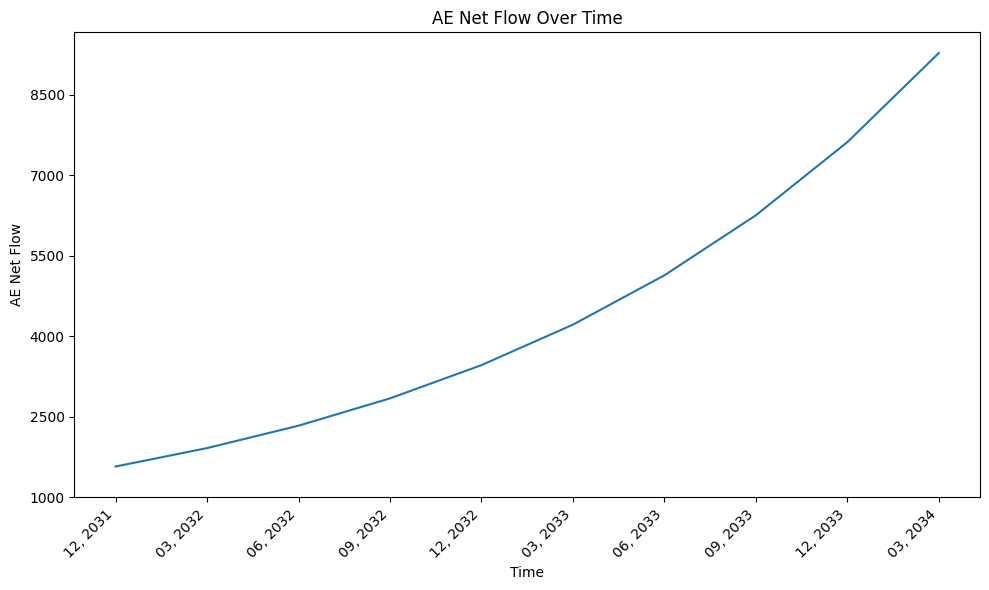

In [7]:
# Convert the 'Time (weeks)' column to datetime format
simulation_results_df['Time'] = pd.to_datetime(simulation_results_df['Time'], format='%d-%m-%Y')

# Calculate the maximum value rounded up to the nearest 500
max_value = math.ceil(simulation_results_df['AE Net Flow'].max() / 500) * 500

# Plotting the time series of AE Net Flow against Time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(simulation_results_df['Time'], simulation_results_df['AE Net Flow'])

# Giving title to the chart using plt.title
plt.title('AE Net Flow Over Time')

# Set the number of x-axis tick labels to be displayed
num_tick_labels = 10  # Adjust as needed

# Choose indices for tick locations
tick_indices = np.linspace(0, len(simulation_results_df) - 1, num=num_tick_labels, dtype=int)

# Use tick_indices to set tick positions and labels
plt.xticks(simulation_results_df['Time'][tick_indices], simulation_results_df['Time'][tick_indices].dt.strftime('%m, %Y'), rotation=45, ha='right')

# Setting y-axis intervals to 500 starting from the first point of the graph
plt.yticks(np.arange(1000, max_value + 1, 1500))

# Providing x and y label to the chart
plt.xlabel('Time')
plt.ylabel('AE Net Flow')

# Display the plot
plt.tight_layout()
plt.show()

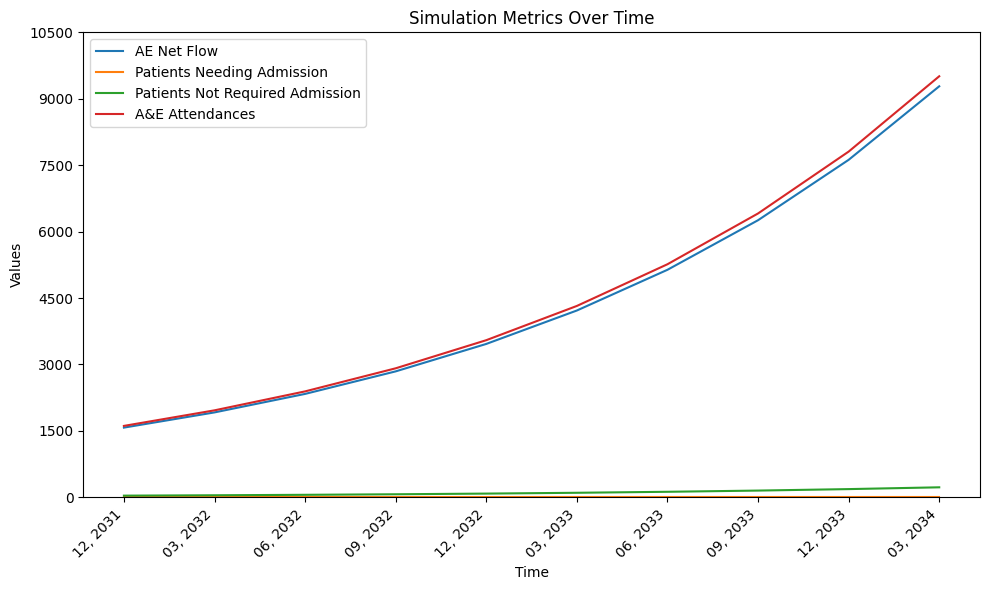

In [8]:
# Load the simulation results from the CSV file (replace 'simulation_results.csv' with your actual file name)
simulation_results_df = pd.read_csv('simulation_results.csv')

# Convert the 'Time (weeks)' column to datetime format
simulation_results_df['Time'] = pd.to_datetime(simulation_results_df['Time'], format='%d-%m-%Y')

# Calculate the maximum value rounded up to the nearest 500
max_value = math.ceil(simulation_results_df[['AE Net Flow', 'Patients Needing Admission', 'Patients Not Required Admission', 'A&E Attendances']].max().max() / 500) * 500

# Plotting the time series of different metrics against Time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plotting AE Net Flow
plt.plot(simulation_results_df['Time'], simulation_results_df['AE Net Flow'], label='AE Net Flow')

# Plotting Patients Needing Admission
plt.plot(simulation_results_df['Time'], simulation_results_df['Patients Needing Admission'], label='Patients Needing Admission')

# Plotting Patients Not Required Admission
plt.plot(simulation_results_df['Time'], simulation_results_df['Patients Not Required Admission'], label='Patients Not Required Admission')

# Plotting A&E Attendances
plt.plot(simulation_results_df['Time'], simulation_results_df["A&E Attendances"], label='A&E Attendances')

# Giving title to the chart using plt.title
plt.title('Simulation Metrics Over Time')

# Set the number of x-axis tick labels to be displayed
num_tick_labels = 10  # Adjust as needed

# Choose indices for tick locations
tick_indices = np.linspace(0, len(simulation_results_df) - 1, num=num_tick_labels, dtype=int)

# Use tick_indices to set tick positions and labels
plt.xticks(simulation_results_df['Time'][tick_indices], simulation_results_df['Time'][tick_indices].dt.strftime('%m, %Y'), rotation=45, ha='right')

# Setting y-axis limits and intervals
plt.ylim(0, max_value + 500)  # Adjust the upper limit as needed
plt.yticks(np.arange(0, max_value + 1000, 1500))

# Providing x and y label to the chart
plt.xlabel('Time')
plt.ylabel('Values')

# Adding legends
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

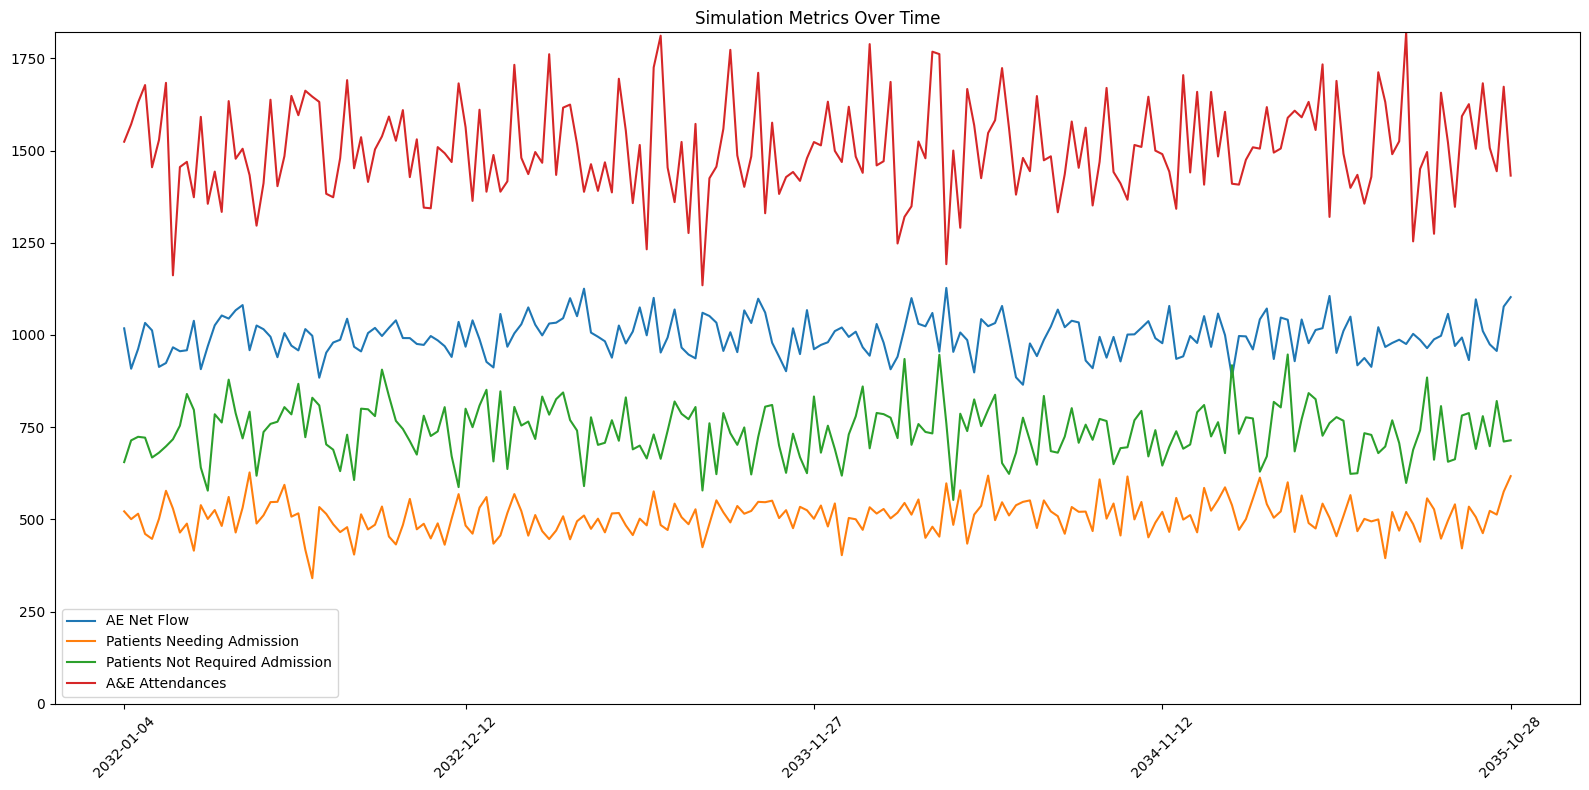

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
simulation_results_df = pd.DataFrame({'Time': pd.date_range('2032-01-01', periods=200, freq='W'),
                                      'AE Net Flow': np.random.randn(200)*50 + 1000,
                                      'Patients Needing Admission': np.random.randn(200)*50 + 500,
                                      'Patients Not Required Admission': np.random.randn(200)*75 + 750,
                                      'A&E Attendances': np.random.randn(200)*125 + 1500})

# Plot zoomed out view
plt.figure(figsize=(16,8))

plt.plot(simulation_results_df['Time'], simulation_results_df['AE Net Flow'], label='AE Net Flow')
plt.plot(simulation_results_df['Time'], simulation_results_df['Patients Needing Admission'], label='Patients Needing Admission')
plt.plot(simulation_results_df['Time'], simulation_results_df['Patients Not Required Admission'], label='Patients Not Required Admission')
plt.plot(simulation_results_df['Time'], simulation_results_df['A&E Attendances'], label='A&E Attendances')

num_tick_labels = 5
tick_indices = np.linspace(0, len(simulation_results_df)-1, num=num_tick_labels, dtype=int)
plt.xticks(simulation_results_df['Time'][tick_indices], rotation=45)

plt.ylim(0, simulation_results_df[['AE Net Flow', 'Patients Needing Admission', 'Patients Not Required Admission', 'A&E Attendances']].max().max())

plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('Simulation Metrics Over Time')

plt.tight_layout()
plt.show()

store and plot non elective waiting admissions

In [10]:
# After you've run your simulation
SysDy1.run_non_elective_simulation()
non_elective_simulation_df = SysDy1.get_non_elective_simulation_results_dataframe()
pd.set_option('display.float_format', '{:.6f}'.format)


# Save to CSV
non_elective_simulation_df.to_csv('non_elective_simulation_results.csv', index=False)
print("Non-Elective Simulation results saved to 'non_elective_simulation_results.csv'")
import matplotlib.pyplot as plt
print(non_elective_simulation_df['Patients Needing Admission'].head(10))
print(non_elective_simulation_df['Patients Needing Admission'].describe())



Debug - calculate_AEattendance: Current Time: 2031-12-27 00:00:00
Debug - calculate_PatientsNadmission: Forecast Attendance: 1613.0, Delay Days: 0.023809523809523808
Debug - Patients Needing Admission: 3.84047619047619e-05
Debug - calculate_AEattendance: Current Time: 2032-03-27 00:00:00
Debug - calculate_PatientsNadmission: Forecast Attendance: 1964.4457397226554, Delay Days: 0.023809523809523808
Debug - Patients Needing Admission: 4.6772517612444164e-05
Debug - calculate_AEattendance: Current Time: 2032-06-26 00:00:00
Debug - calculate_PatientsNadmission: Forecast Attendance: 2392.465631937068, Delay Days: 0.023809523809523808
Debug - Patients Needing Admission: 5.696346742707304e-05
Debug - calculate_AEattendance: Current Time: 2032-09-25 00:00:00
Debug - calculate_PatientsNadmission: Forecast Attendance: 2913.7439045825436, Delay Days: 0.023809523809523808
Debug - Patients Needing Admission: 6.937485487101293e-05
Debug - calculate_AEattendance: Current Time: 2032-12-25 00:00:00
Deb

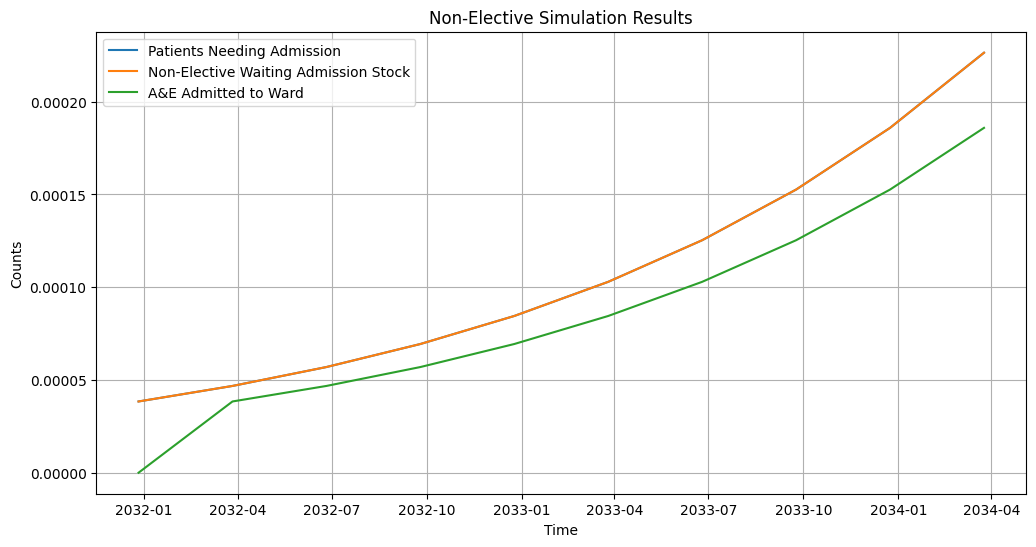

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(non_elective_simulation_df['Time'], non_elective_simulation_df['Patients Needing Admission'], label='Patients Needing Admission')
plt.plot(non_elective_simulation_df['Time'], non_elective_simulation_df['Non-Elective Waiting Admission Stock'], label='Non-Elective Waiting Admission Stock')
plt.plot(non_elective_simulation_df['Time'], non_elective_simulation_df['A&E Admitted to Ward'], label='A&E Admitted to Ward')
plt.legend()
plt.title("Non-Elective Simulation Results")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

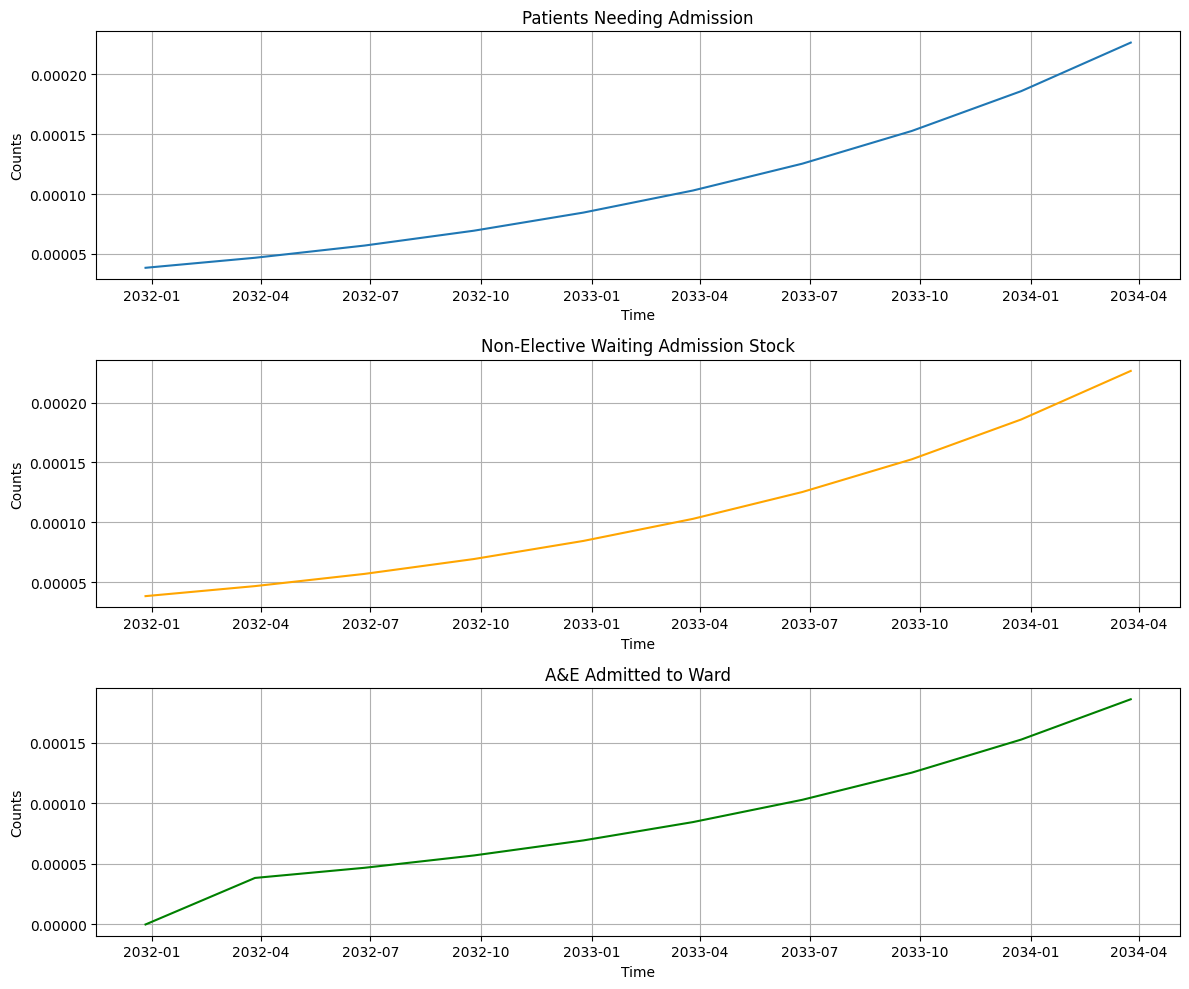

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(non_elective_simulation_df['Time'], non_elective_simulation_df['Patients Needing Admission'], label='Patients Needing Admission')
axs[0].set_title("Patients Needing Admission")
axs[0].grid(True)

axs[1].plot(non_elective_simulation_df['Time'], non_elective_simulation_df['Non-Elective Waiting Admission Stock'], label='Non-Elective Waiting Admission Stock', color='orange')
axs[1].set_title("Non-Elective Waiting Admission Stock")
axs[1].grid(True)

axs[2].plot(non_elective_simulation_df['Time'], non_elective_simulation_df['A&E Admitted to Ward'], label='A&E Admitted to Ward', color='green')
axs[2].set_title("A&E Admitted to Ward")
axs[2].grid(True)

for ax in axs:
    ax.set_xlabel("Time")
    ax.set_ylabel("Counts")

plt.tight_layout()
plt.show()
